In [1]:
import pandas as pd
df = pd.read_csv("student_habits_performance.csv")

In [2]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.shape

(1000, 16)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [6]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [12]:
df.describe(include="object").columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [13]:
categorical_cols = ["gender", "part_time_job", "diet_quality", "parental_education_level", "internet_quality", "extracurricular_participation"]

In [14]:
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}")

Value counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value counts for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


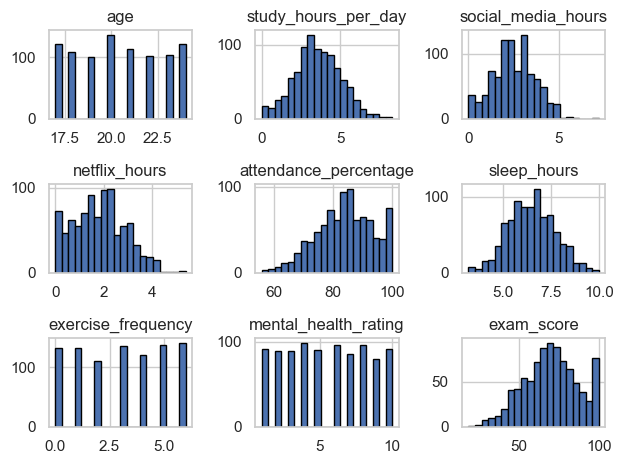

In [15]:
df.hist(bins = 20, edgecolor="black")
plt.tight_layout()
plt.show()

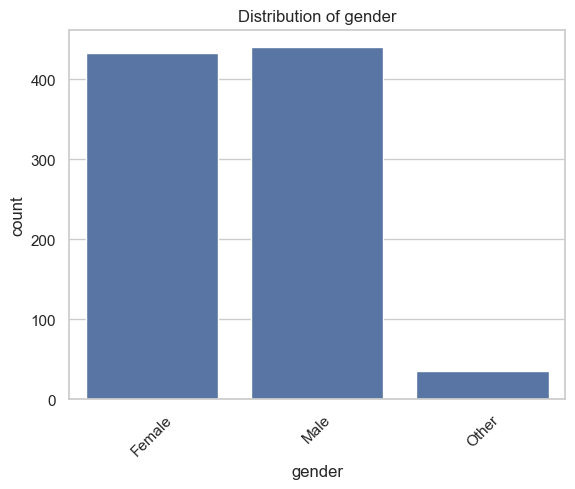

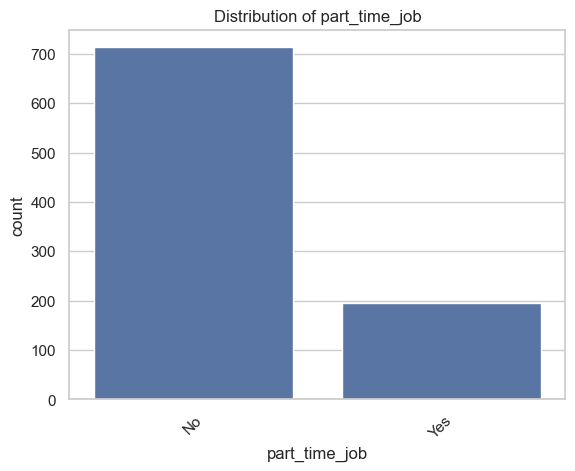

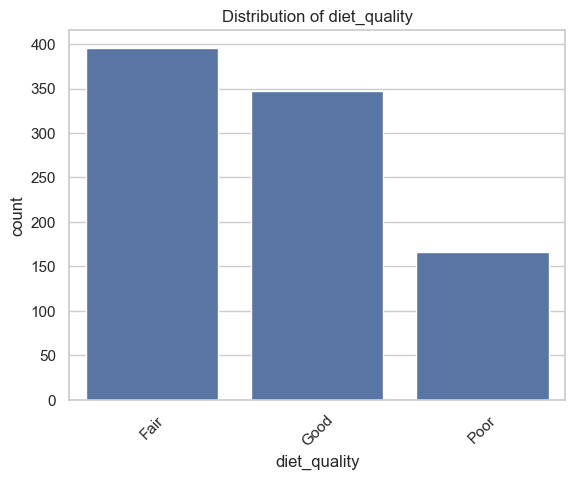

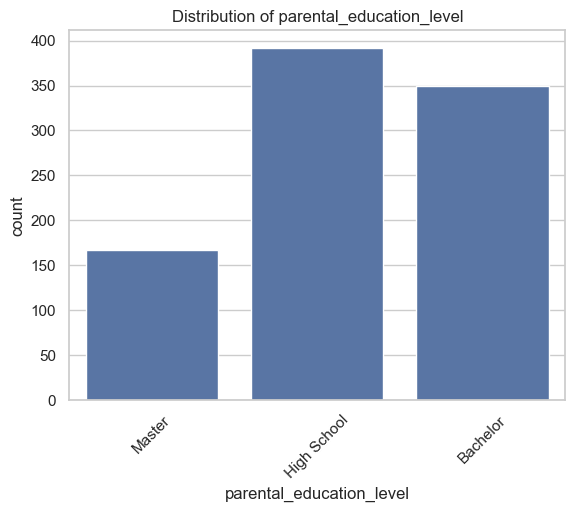

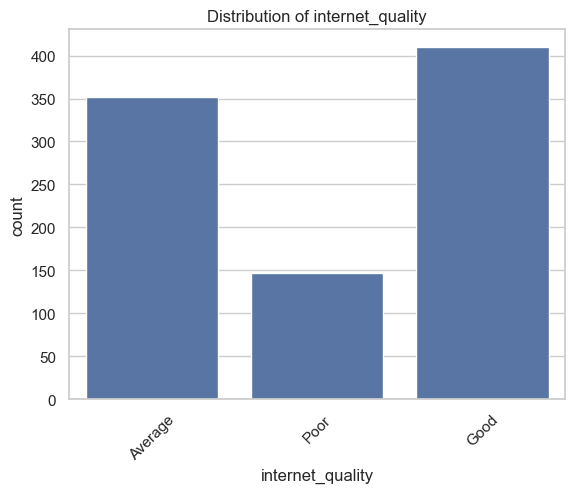

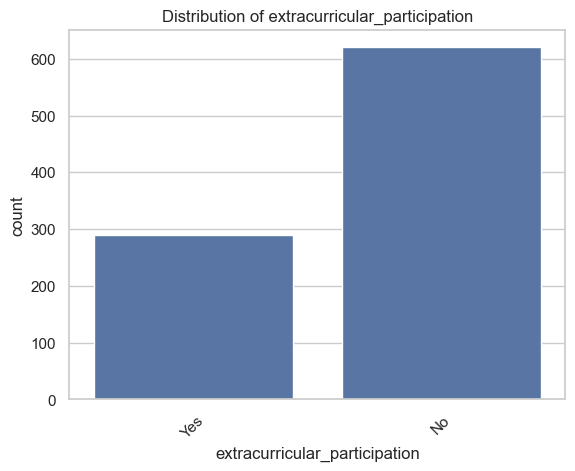

In [16]:
for col in categorical_cols:
    sns.countplot(df, x = col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

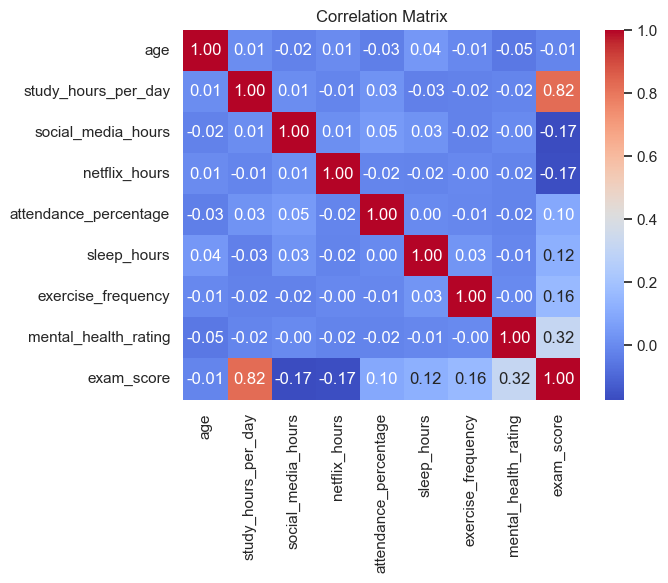

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [19]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

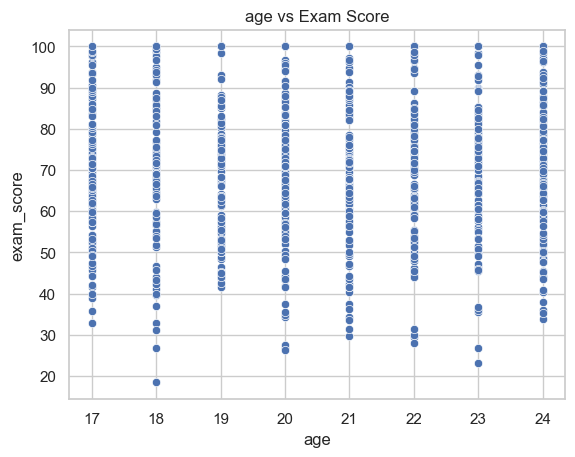

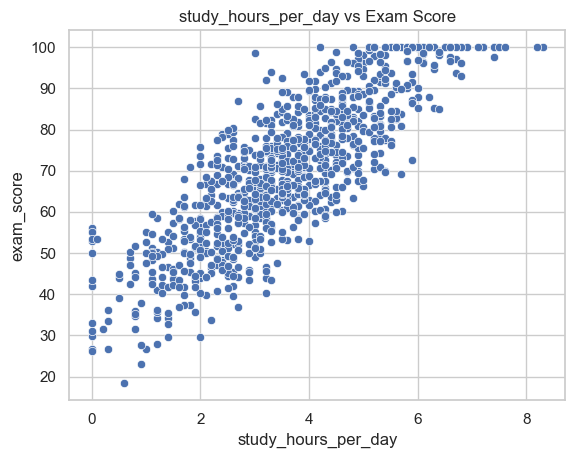

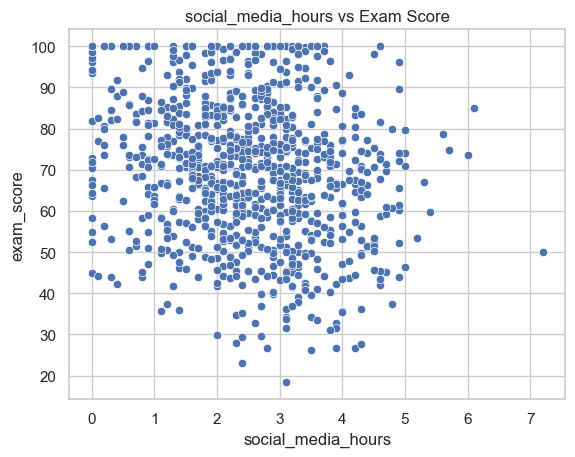

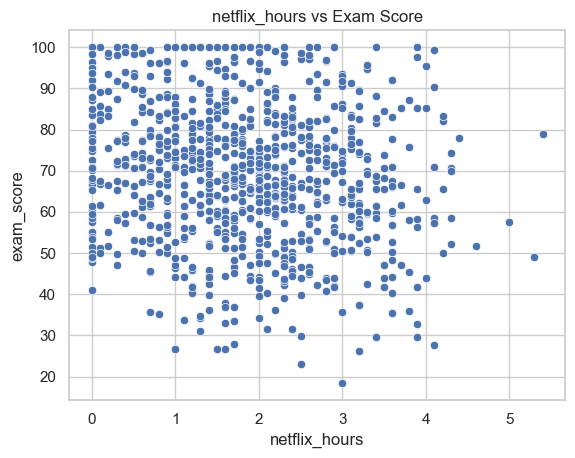

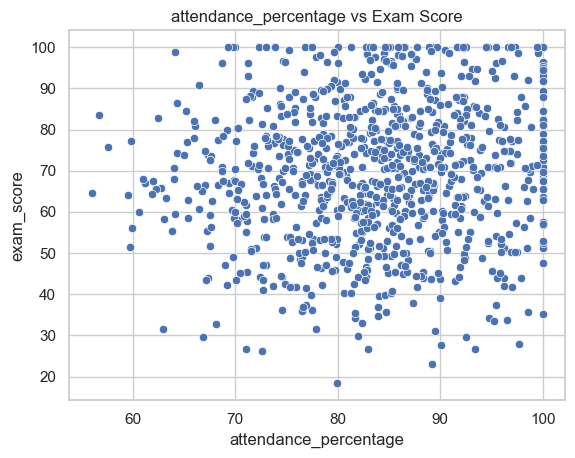

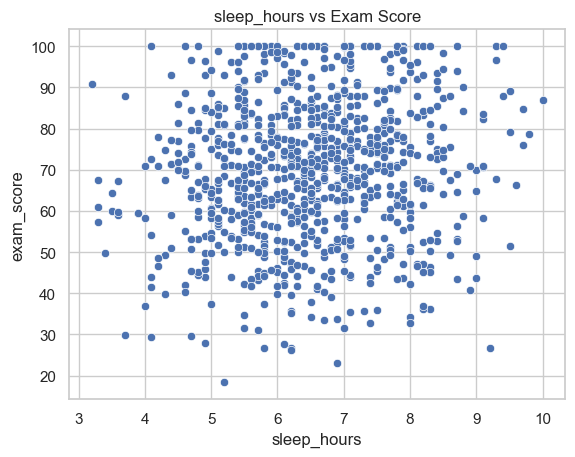

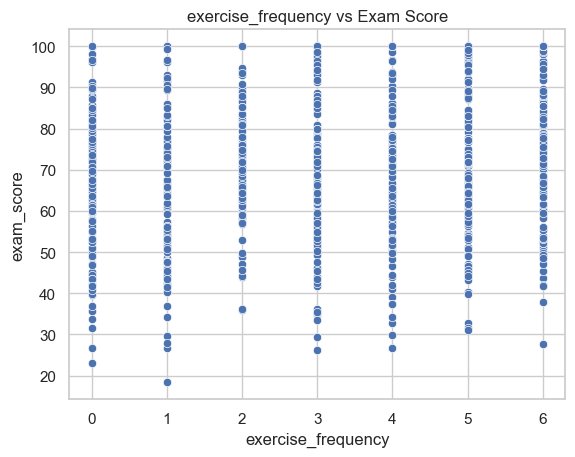

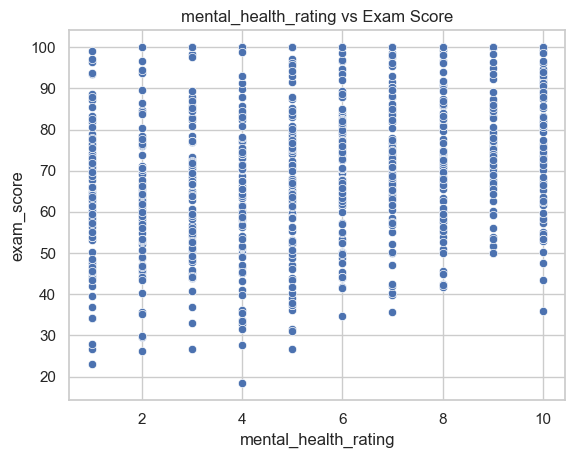

In [20]:
for feature in num_features:
    sns.scatterplot(data = df, x = feature, y = "exam_score")
    plt.title(f"{feature} vs Exam Score")
    plt.show()

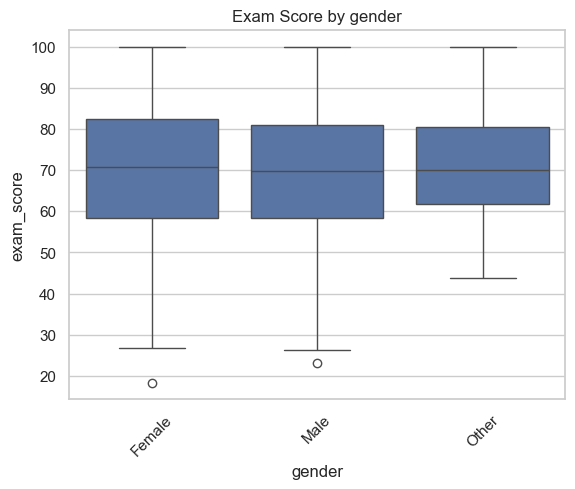

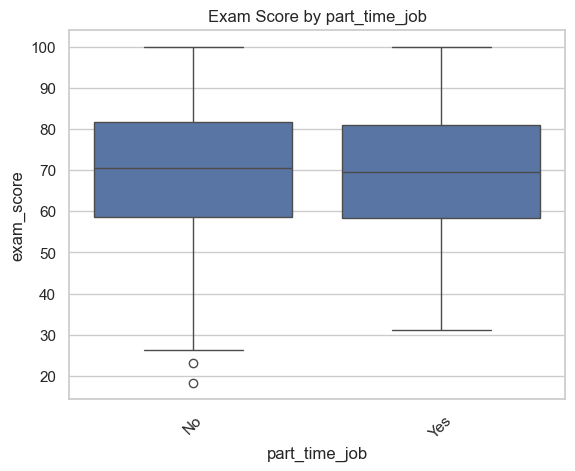

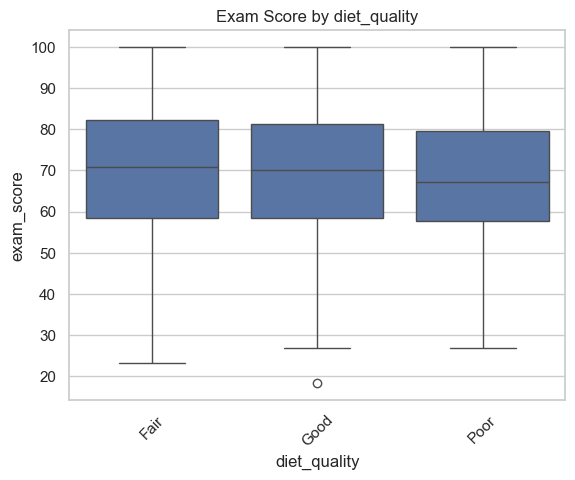

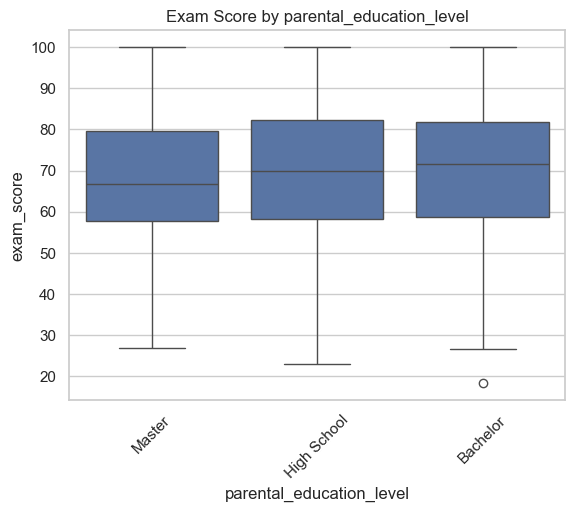

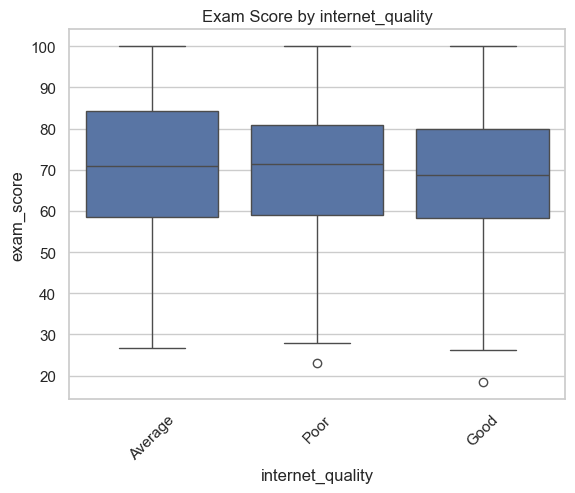

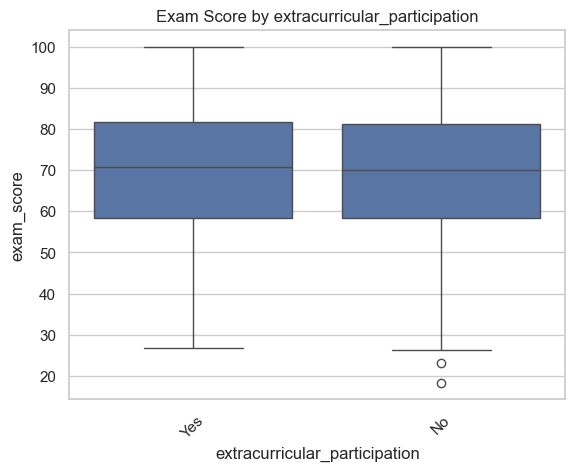

In [21]:
for col in categorical_cols:
    sns.boxplot(data = df, x = col, y = "exam_score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.show()